# 线性回归模型一

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #将一维数据转换成二维数据，因为神经网络中只能对二维数据进行操作
y = x.pow(2) + 0.2* torch.rand(x.size()) #  x.pow(x)意为x^2 ; 0.2* torch.rand(x.size())目的是为了给数据添加噪声
# a = torch.rand(x.size())
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [ ]:
# 搭建神经网络
# 方法一
""" class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = torch.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture """
# 方法二，快速搭建法
net2 = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)
print(net2)

In [ ]:
optimizer = torch.optim.SGD(net2.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

In [ ]:
plt.ion()   # something about plotting

for t in range(100):
    prediction = net2(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

# 线性回归模型二

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

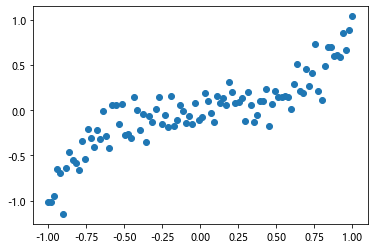

In [23]:
x1  = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x1.pow(3)+0.15* torch.randn(x1.size())
plt.scatter(x1.data.numpy(),y.data.numpy())
plt.show()

In [24]:
# 构建神经网络
# 方法一。模版构建法
""" class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = torch.relu(out)
        out = self.hidden2(out)
        out = torch.sigmoid(out)
        out = self.predict(out)
        return out
net = Net(1,20,1) 
print(net) """

' class Net(nn.Module):\n    def __init__(self,n_input,n_hidden,n_output):\n        super(Net,self).__init__()\n        self.hidden1 = nn.Linear(n_input,n_hidden)\n        self.hidden2 = nn.Linear(n_hidden,n_hidden)\n        self.predict = nn.Linear(n_hidden,n_output)\n    def forward(self,input):\n        out = self.hidden1(input)\n        out = torch.relu(out)\n        out = self.hidden2(out)\n        out = torch.sigmoid(out)\n        out = self.predict(out)\n        return out\nnet = Net(1,20,1) \nprint(net) '

In [31]:
# 方法二，快速构建法 
net = torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,10),
    torch.nn.Sigmoid(),
    torch.nn.Linear(10,1),
)
print(net)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=1, bias=True)
)


In [32]:
#构建优化器和损失函数
optimizer = torch.optim.SGD(net.parameters(),lr= 0.01,momentum=0.9)
loss_func = torch.nn.MSELoss()

In [30]:
plt.ion()
plt.show()
for t in range(100):
    prediction = net(x1)
    loss = loss_func(prediction,y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if t% 10 ==0:
        plt.cla()
        plt.scatter(x1.data.numpy(),y.data.numpy())
        plt.plot(x1.data.numpy(),prediction.data.numpy(),'r-',lw= 5)
        plt.text(0.5,0,'loss=%.4f'% loss.data,fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.05)

plt.ioff()
plt.show()


RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 10x1)